Program uses machine learning to predicts price of BTC for next 30 days. Reference: https://www.youtube.com/watch?v=AaEbtnplqjw&list=PLBhJnyA0V0uLLhGrJTKLNYfd7_Q-8_jja&index=49

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('BTC-USD.csv')
# Drop na rows
df.dropna(subset=['Close'], inplace=True)

In [3]:
# Variable for predicting n days into future
prediction_days = 30

# Dependent Variable, Column shifted n units up
df['Close_Prediction'] = df[['Close']].shift(-prediction_days)

In [4]:
# Create independent data, convert df to numpy array of closing price
x = np.array(df.drop(df.columns.difference(['Close']), 1))

# Remove last n rows
x = x[:-prediction_days]

/var/folders/z3/k29jsmxx1ds3zc21hy27hhk40000gn/T/ipykernel_10267/3950734441.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(df.columns.difference(['Close']), 1))


In [5]:
# Create dependent data by converting df prediction to numpy array
y = np.array(df['Close_Prediction'])
y = y[:-prediction_days]

In [6]:
# Split 80% training 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

In [7]:
# Set prediction_days_array equals to last 30 rows from original data set
prediction_days_array = np.array(df.drop(df.columns.difference(['Close']), 1))[-prediction_days:]

/var/folders/z3/k29jsmxx1ds3zc21hy27hhk40000gn/T/ipykernel_10267/2219104752.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  prediction_days_array = np.array(df.drop(df.columns.difference(['Close']), 1))[-prediction_days:]


In [8]:
from sklearn.svm import SVR

# Create and train support Vector Machine (Regression) using radial basis function
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [9]:
# Test model
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print(f'svr_rbf accuract: {svr_rbf_confidence}')

svr_rbf accuract: 0.6308099798128344


In [10]:
# Print predicted values
svm_prediction = svr_rbf.predict(x_test)
# svm_prediction

In [11]:
# Plot predictions vs actual
dfp = pd.DataFrame({'Predictions':svr_rbf.predict(x)})
df = pd.concat([df, dfp], axis=1)
df.reset_index()
df['Predictions'] = df[['Predictions']].shift(30)

In [15]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

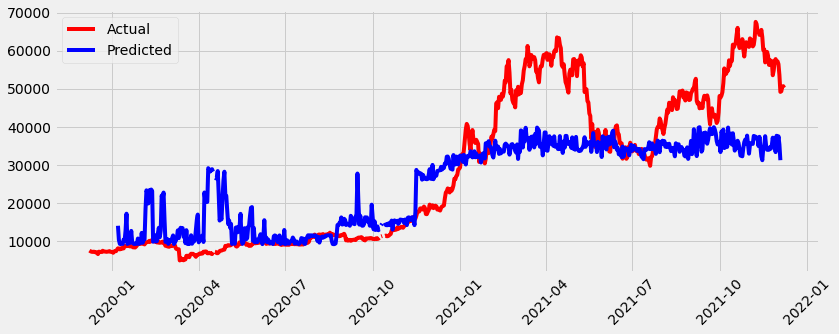

In [13]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['Close'], label='Actual', color='red')
plt.plot(df.index, df['Predictions'], label='Predicted', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

Closing thoughts: The 30day prediction with ML is insignificant since the regression model aids in pattern recognition? There is no clear pattern and historical data does not reflect present data, a more appropriate use of ML would be in combination with technical indicators rather than price itself. It might be more meaningful for ML to seive out a combination of technical indicators that signal price bottoms and tops.